# Frequency distribution of Retweets and Likes for each month until July 2020

We need the following packages:

In [1]:
import pandas as pd
import datetime
from dateutil.parser import parse
import json
import itertools
import altair as alt
import csv
from vega_datasets import data
import pytz
utc=pytz.UTC

alt.data_transformers.disable_max_rows()

DataTransformerRegistry.enable('default')

To read the JSON file that has all the tweets, it is necessary to do:

In [2]:
data = []
with open('dataset/general_result_translated_full.json', 'r') as f:
    for line in f:
        data.append(json.loads(line))

## January 2020

We're interested in the "retweet_count" and "favorite_count" fields:

In [3]:
start = utc.localize(datetime.datetime(2020, 1, 1))
end = utc.localize(datetime.datetime(2020, 1, 31))

index=0
dates = ["2020-01-14"] 
retweets = [0]
likes = [0]

for element in data:
    token = data[index]['created_at']
    d = parse(token)
   
    if start <= d <= end:
        d = d.strftime('%Y-%m-%d')
        if d in dates:
            i = dates.index(d)
            retweets[i] = retweets[i] + data[index]['retweet_count']
            likes[i] = likes[i]+ data[index]['favorite_count']
        else:
            dates.append(d)
            retweets.append(data[index]['retweet_count'])
            likes.append(data[index]['favorite_count'])
        
       
    index=index+1



# Fill the empty dates with 0.
start = datetime.datetime.strptime("2020-01-01", "%Y-%m-%d")
end = datetime.datetime.strptime("2020-01-31", "%Y-%m-%d")
date_generated = [start + datetime.timedelta(days=x) for x in range(0, (end-start).days)]

for date in date_generated:
    if date.strftime("%Y-%m-%d") not in dates:
        d = date.strftime("%Y-%m-%d")
        dates.append(d)
        retweets.append(0)
        likes.append(0)
       

We create the DataFrames which will be used to realize the chart, one for the Retweets count and one for the Likes count:

In [4]:
df_likes_jan = pd.DataFrame(
    {'Dates': dates,
     'Likes': likes
    })

df_likes_jan['Dates']= pd.to_datetime(df_likes_jan['Dates'])



df_retweets_jan = pd.DataFrame(
    {'Dates': dates,
     'Retweets': retweets
    })

df_retweets_jan['Dates']= pd.to_datetime(df_retweets_jan['Dates'])



df_jan = pd.DataFrame(
    {'Dates': dates,
     'Likes': likes,
     'Retweets': retweets
    })

df_jan['Dates']= pd.to_datetime(df_jan['Dates'])
df_jan = df_jan.sort_values(by=['Dates'], ascending=True)

We've normalised the count of Likes and Retweets using Min-Max Normalization in the scale of [0; 1].

In [5]:
# Likes and Retweets normalization.
# https://www.geeksforgeeks.org/normalize-a-column-in-pandas/

df_norm_jan = df_jan.copy()
df_norm_jan[['Likes', 'Retweets']] = (df_norm_jan[['Likes', 'Retweets']] - df_norm_jan[['Likes', 'Retweets']].min()) / (df_norm_jan[['Likes', 'Retweets']].max() - df_norm_jan[['Likes', 'Retweets']].min())
df_likes_jan['Likes'] = df_norm_jan['Likes']
df_retweets_jan['Retweets'] = df_norm_jan['Retweets']

The line chart is created:

In [6]:
c1_jan = alt.Chart(df_likes_jan).mark_line().encode(
    x="monthdate(Dates):T",
    y="Likes",
    color=alt.value("#A8D8A8")
).properties(
    width=280,
    height=130
)
c1_jan.encoding.x.title = 'Dates'

c2_jan = alt.Chart(df_retweets_jan).mark_line().encode(
    x="monthdate(Dates):T",
    y="Retweets",
    color=alt.value("#F3C0E0")
).properties(
    width=280,
    height=130
)
c2_jan.encoding.x.title = 'Dates'

We normalised the count of Retweets and Likes for the overall month together and plotted the normalised count of Retweets and Likes for both false and partially false and plotted it for each month, until July 2020.

## February 2020

In [7]:
start = utc.localize(datetime.datetime(2020, 2, 1))
end = utc.localize(datetime.datetime(2020, 2, 29))

index=0
dates = ["2020-02-01"] 
retweets = [0]
likes = [0]

for element in data:
    token = data[index]['created_at']
    d = parse(token)
   
    if start <= d <= end:
        d = d.strftime('%Y-%m-%d')
        if d in dates:
            i = dates.index(d)
            retweets[i] = retweets[i] + data[index]['retweet_count']
            likes[i] = likes[i]+ data[index]['favorite_count']
        else:
            dates.append(d)
            retweets.append(data[index]['retweet_count'])
            likes.append(data[index]['favorite_count'])
        
       
    index=index+1

    

start = datetime.datetime.strptime("2020-02-01", "%Y-%m-%d")
end = datetime.datetime.strptime("2020-02-29", "%Y-%m-%d")
date_generated = [start + datetime.timedelta(days=x) for x in range(0, (end-start).days)]

for date in date_generated:
    if date.strftime("%Y-%m-%d") not in dates:
        d = date.strftime("%Y-%m-%d")
        dates.append(d)
        retweets.append(0)
        likes.append(0)

        

df_likes_feb = pd.DataFrame(
    {'Dates': dates,
     'Likes': likes
    })

df_likes_feb['Dates']= pd.to_datetime(df_likes_feb['Dates'])



df_retweets_feb = pd.DataFrame(
    {'Dates': dates,
     'Retweets': retweets
    })

df_retweets_feb['Dates']= pd.to_datetime(df_retweets_feb['Dates'])



df_feb = pd.DataFrame(
    {'Dates': dates,
     'Likes': likes,
     'Retweets': retweets
    })

df_feb['Dates']= pd.to_datetime(df_feb['Dates'])
df_feb = df_feb.sort_values(by=['Dates'], ascending=True)



df_norm_feb = df_feb.copy()
df_norm_feb[['Likes', 'Retweets']] = (df_norm_feb[['Likes', 'Retweets']] - df_norm_feb[['Likes', 'Retweets']].min()) / (df_norm_feb[['Likes', 'Retweets']].max() - df_norm_feb[['Likes', 'Retweets']].min())
df_likes_feb['Likes'] = df_norm_feb['Likes']
df_retweets_feb['Retweets'] = df_norm_feb['Retweets']


c1_feb = alt.Chart(df_likes_feb).mark_line().encode(
    x="monthdate(Dates):T",
    y="Likes",
    color=alt.value("#009E73")
).properties(
    width=280,
    height=130
)
c1_feb.encoding.x.title = 'Dates'

c2_feb = alt.Chart(df_retweets_feb).mark_line().encode(
    x="monthdate(Dates):T",
    y="Retweets",
    color=alt.value("#FF4C9D")
).properties(
    width=280,
    height=130
)
c2_feb.encoding.x.title = 'Dates'

## March 2020

In [8]:
start = utc.localize(datetime.datetime(2020, 3, 1))
end = utc.localize(datetime.datetime(2020, 3, 31))

index=0
dates = ["2020-03-01"] 
retweets = [0]
likes = [0]

for element in data:
    token = data[index]['created_at']
    d = parse(token)
   
    if start <= d <= end:
        d = d.strftime('%Y-%m-%d')
        if d in dates:
            i = dates.index(d)
            retweets[i] = retweets[i] + data[index]['retweet_count']
            likes[i] = likes[i]+ data[index]['favorite_count']
        else:
            dates.append(d)
            retweets.append(data[index]['retweet_count'])
            likes.append(data[index]['favorite_count'])
        
       
    index=index+1

    

start = datetime.datetime.strptime("2020-03-01", "%Y-%m-%d")
end = datetime.datetime.strptime("2020-03-31", "%Y-%m-%d")
date_generated = [start + datetime.timedelta(days=x) for x in range(0, (end-start).days)]

for date in date_generated:
    if date.strftime("%Y-%m-%d") not in dates:
        d = date.strftime("%Y-%m-%d")
        dates.append(d)
        retweets.append(0)
        likes.append(0)

        

df_likes_mar = pd.DataFrame(
    {'Dates': dates,
     'Likes': likes
    })

df_likes_mar['Dates']= pd.to_datetime(df_likes_mar['Dates'])



df_retweets_mar = pd.DataFrame(
    {'Dates': dates,
     'Retweets': retweets
    })

df_retweets_mar['Dates']= pd.to_datetime(df_retweets_mar['Dates'])



df_mar = pd.DataFrame(
    {'Dates': dates,
     'Likes': likes,
     'Retweets': retweets
    })

df_mar['Dates']= pd.to_datetime(df_mar['Dates'])
df_mar = df_mar.sort_values(by=['Dates'], ascending=True)



df_norm_mar = df_mar.copy()
df_norm_mar[['Likes', 'Retweets']] = (df_norm_mar[['Likes', 'Retweets']] - df_norm_mar[['Likes', 'Retweets']].min()) / (df_norm_mar[['Likes', 'Retweets']].max() - df_norm_mar[['Likes', 'Retweets']].min())
df_likes_mar['Likes'] = df_norm_mar['Likes']
df_retweets_mar['Retweets'] = df_norm_mar['Retweets']


c1_mar = alt.Chart(df_likes_mar).mark_line().encode(
    x="monthdate(Dates):T",
    y="Likes",
    color=alt.value("#024429")
).properties(
    width=280,
    height=130
)
c1_mar.encoding.x.title = 'Dates'

c2_mar = alt.Chart(df_retweets_mar).mark_line().encode(
    x="monthdate(Dates):T",
    y="Retweets",
    color=alt.value("#DC7AC3")
).properties(
    width=280,
    height=130
)
c2_mar.encoding.x.title = 'Dates'

## April 2020

In [9]:
start = utc.localize(datetime.datetime(2020, 4, 1))
end = utc.localize(datetime.datetime(2020, 4, 30))

index=0
dates = ["2020-04-01"] 
retweets = [0]
likes = [0]

for element in data:
    token = data[index]['created_at']
    d = parse(token)
   
    if start <= d <= end:
        d = d.strftime('%Y-%m-%d')
        if d in dates:
            i = dates.index(d)
            retweets[i] = retweets[i] + data[index]['retweet_count']
            likes[i] = likes[i]+ data[index]['favorite_count']
        else:
            dates.append(d)
            retweets.append(data[index]['retweet_count'])
            likes.append(data[index]['favorite_count'])
        
       
    index=index+1

    

start = datetime.datetime.strptime("2020-04-01", "%Y-%m-%d")
end = datetime.datetime.strptime("2020-04-30", "%Y-%m-%d")
date_generated = [start + datetime.timedelta(days=x) for x in range(0, (end-start).days)]

for date in date_generated:
    if date.strftime("%Y-%m-%d") not in dates:
        d = date.strftime("%Y-%m-%d")
        dates.append(d)
        retweets.append(0)
        likes.append(0)

        

df_likes_apr = pd.DataFrame(
    {'Dates': dates,
     'Likes': likes
    })

df_likes_apr['Dates']= pd.to_datetime(df_likes_apr['Dates'])



df_retweets_apr = pd.DataFrame(
    {'Dates': dates,
     'Retweets': retweets
    })

df_retweets_apr['Dates']= pd.to_datetime(df_retweets_apr['Dates'])



df_apr = pd.DataFrame(
    {'Dates': dates,
     'Likes': likes,
     'Retweets': retweets
    })

df_apr['Dates']= pd.to_datetime(df_apr['Dates'])
df_apr = df_apr.sort_values(by=['Dates'], ascending=True)



df_norm_apr = df_apr.copy()
df_norm_apr[['Likes', 'Retweets']] = (df_norm_apr[['Likes', 'Retweets']] - df_norm_apr[['Likes', 'Retweets']].min()) / (df_norm_apr[['Likes', 'Retweets']].max() - df_norm_apr[['Likes', 'Retweets']].min())
df_likes_apr['Likes'] = df_norm_apr['Likes']
df_retweets_apr['Retweets'] = df_norm_apr['Retweets']


c1_apr = alt.Chart(df_likes_apr).mark_line().encode(
    x="monthdate(Dates):T",
    y="Likes",
    color=alt.value("#609048")
).properties(
    width=280,
    height=130
)
c1_apr.encoding.x.title = 'Dates'

c2_apr = alt.Chart(df_retweets_apr).mark_line().encode(
    x="monthdate(Dates):T",
    y="Retweets",
    color=alt.value("#AA4499")
).properties(
    width=280,
    height=130
)
c2_apr.encoding.x.title = 'Dates'

## May 2020

In [10]:
start = utc.localize(datetime.datetime(2020, 5, 1))
end = utc.localize(datetime.datetime(2020, 5, 31))

index=0
dates = ["2020-05-01"] 
retweets = [0]
likes = [0]

for element in data:
    token = data[index]['created_at']
    d = parse(token)
   
    if start <= d <= end:
        d = d.strftime('%Y-%m-%d')
        if d in dates:
            i = dates.index(d)
            retweets[i] = retweets[i] + data[index]['retweet_count']
            likes[i] = likes[i]+ data[index]['favorite_count']
        else:
            dates.append(d)
            retweets.append(data[index]['retweet_count'])
            likes.append(data[index]['favorite_count'])
        
       
    index=index+1

    

start = datetime.datetime.strptime("2020-05-01", "%Y-%m-%d")
end = datetime.datetime.strptime("2020-05-31", "%Y-%m-%d")
date_generated = [start + datetime.timedelta(days=x) for x in range(0, (end-start).days)]

for date in date_generated:
    if date.strftime("%Y-%m-%d") not in dates:
        d = date.strftime("%Y-%m-%d")
        dates.append(d)
        retweets.append(0)
        likes.append(0)

        

df_likes_may = pd.DataFrame(
    {'Dates': dates,
     'Likes': likes
    })

df_likes_may['Dates']= pd.to_datetime(df_likes_may['Dates'])



df_retweets_may = pd.DataFrame(
    {'Dates': dates,
     'Retweets': retweets
    })

df_retweets_may['Dates']= pd.to_datetime(df_retweets_may['Dates'])



df_may = pd.DataFrame(
    {'Dates': dates,
     'Likes': likes,
     'Retweets': retweets
    })

df_may['Dates']= pd.to_datetime(df_may['Dates'])
df_may = df_may.sort_values(by=['Dates'], ascending=True)



df_norm_may = df_may.copy()
df_norm_may[['Likes', 'Retweets']] = (df_norm_may[['Likes', 'Retweets']] - df_norm_may[['Likes', 'Retweets']].min()) / (df_norm_may[['Likes', 'Retweets']].max() - df_norm_may[['Likes', 'Retweets']].min())
df_likes_may['Likes'] = df_norm_may['Likes']
df_retweets_may['Retweets'] = df_norm_may['Retweets']


c1_may = alt.Chart(df_likes_may).mark_line().encode(
    x="monthdate(Dates):T",
    y="Likes",
    color=alt.value("#117733")
).properties(
    width=280,
    height=130
)
c1_may.encoding.x.title = 'Dates'

c2_may = alt.Chart(df_retweets_may).mark_line().encode(
    x="monthdate(Dates):T",
    y="Retweets",
    color=alt.value("#9A1557")
).properties(
    width=280,
    height=130
)
c2_may.encoding.x.title = 'Dates'

## June 2020

In [11]:
start = utc.localize(datetime.datetime(2020, 6, 1))
end = utc.localize(datetime.datetime(2020, 6, 30))

index=0
dates = ["2020-06-01"] 
retweets = [0]
likes = [0]

for element in data:
    token = data[index]['created_at']
    d = parse(token)
   
    if start <= d <= end:
        d = d.strftime('%Y-%m-%d')
        if d in dates:
            i = dates.index(d)
            retweets[i] = retweets[i] + data[index]['retweet_count']
            likes[i] = likes[i]+ data[index]['favorite_count']
        else:
            dates.append(d)
            retweets.append(data[index]['retweet_count'])
            likes.append(data[index]['favorite_count'])
        
       
    index=index+1

    

start = datetime.datetime.strptime("2020-06-01", "%Y-%m-%d")
end = datetime.datetime.strptime("2020-06-30", "%Y-%m-%d")
date_generated = [start + datetime.timedelta(days=x) for x in range(0, (end-start).days)]

for date in date_generated:
    if date.strftime("%Y-%m-%d") not in dates:
        d = date.strftime("%Y-%m-%d")
        dates.append(d)
        retweets.append(0)
        likes.append(0)

        

df_likes_jun = pd.DataFrame(
    {'Dates': dates,
     'Likes': likes
    })

df_likes_jun['Dates']= pd.to_datetime(df_likes_jun['Dates'])



df_retweets_jun = pd.DataFrame(
    {'Dates': dates,
     'Retweets': retweets
    })

df_retweets_jun['Dates']= pd.to_datetime(df_retweets_jun['Dates'])



df_jun = pd.DataFrame(
    {'Dates': dates,
     'Likes': likes,
     'Retweets': retweets
    })

df_jun['Dates']= pd.to_datetime(df_jun['Dates'])
df_jun = df_jun.sort_values(by=['Dates'], ascending=True)



df_norm_jun = df_jun.copy()
df_norm_jun[['Likes', 'Retweets']] = (df_norm_jun[['Likes', 'Retweets']] - df_norm_jun[['Likes', 'Retweets']].min()) / (df_norm_jun[['Likes', 'Retweets']].max() - df_norm_jun[['Likes', 'Retweets']].min())
df_likes_jun['Likes'] = df_norm_jun['Likes']
df_retweets_jun['Retweets'] = df_norm_jun['Retweets']


c1_jun = alt.Chart(df_likes_jun).mark_line().encode(
    x="monthdate(Dates):T",
    y="Likes",
    color=alt.value("#00C000")
).properties(
    width=280,
    height=130
)
c1_jun.encoding.x.title = 'Dates'

c2_jun = alt.Chart(df_retweets_jun).mark_line().encode(
    x="monthdate(Dates):T",
    y="Retweets",
    color=alt.value("#D2458B")
).properties(
    width=280,
    height=130
)
c2_jun.encoding.x.title = 'Dates'

## July 2020

In [12]:
start = utc.localize(datetime.datetime(2020, 7, 1))
end = utc.localize(datetime.datetime(2020, 7, 31))

index=0
dates = ["2020-07-01"] 
retweets = [0]
likes = [0]

for element in data:
    token = data[index]['created_at']
    d = parse(token)
   
    if start <= d <= end:
        d = d.strftime('%Y-%m-%d')
        if d in dates:
            i = dates.index(d)
            retweets[i] = retweets[i] + data[index]['retweet_count']
            likes[i] = likes[i]+ data[index]['favorite_count']
        else:
            dates.append(d)
            retweets.append(data[index]['retweet_count'])
            likes.append(data[index]['favorite_count'])
        
       
    index=index+1

    

start = datetime.datetime.strptime("2020-07-01", "%Y-%m-%d")
end = datetime.datetime.strptime("2020-07-31", "%Y-%m-%d")
date_generated = [start + datetime.timedelta(days=x) for x in range(0, (end-start).days)]

for date in date_generated:
    if date.strftime("%Y-%m-%d") not in dates:
        d = date.strftime("%Y-%m-%d")
        dates.append(d)
        retweets.append(0)
        likes.append(0)

        

df_likes_jul = pd.DataFrame(
    {'Dates': dates,
     'Likes': likes
    })

df_likes_jul['Dates']= pd.to_datetime(df_likes_jul['Dates'])



df_retweets_jul = pd.DataFrame(
    {'Dates': dates,
     'Retweets': retweets
    })

df_retweets_jul['Dates']= pd.to_datetime(df_retweets_jul['Dates'])



df_jul = pd.DataFrame(
    {'Dates': dates,
     'Likes': likes,
     'Retweets': retweets
    })

df_jul['Dates']= pd.to_datetime(df_jul['Dates'])
df_jul = df_jul.sort_values(by=['Dates'], ascending=True)



df_norm_jul = df_jul.copy()
df_norm_jul[['Likes', 'Retweets']] = (df_norm_jul[['Likes', 'Retweets']] - df_norm_jul[['Likes', 'Retweets']].min()) / (df_norm_jul[['Likes', 'Retweets']].max() - df_norm_jul[['Likes', 'Retweets']].min())
df_likes_jul['Likes'] = df_norm_jul['Likes']
df_retweets_jul['Retweets'] = df_norm_jul['Retweets']


c1_jul = alt.Chart(df_likes_jul).mark_line().encode(
    x="monthdate(Dates):T",
    y="Likes",
    color=alt.value("#00FF7F")
).properties(
    width=280,
    height=130
)
c1_jul.encoding.x.title = 'Dates'

c2_jul = alt.Chart(df_retweets_jul).mark_line().encode(
    x="monthdate(Dates):T",
    y="Retweets",
    color=alt.value("#FF83A8")
).properties(
    width=280,
    height=130
)
c2_jul.encoding.x.title = 'Dates'

To summarize you can find below every chart produced in this notebook.

## January 2020

In [13]:
alt.hconcat(c1_jan, c2_jan).configure_axis(
    labelFontSize=13,
    titleFontSize=15,
    titlePadding=15
)

alt.HConcatChart(...)

## February 2020

In [14]:
alt.hconcat(c1_feb, c2_feb).configure_axis(
    labelFontSize=13,
    titleFontSize=15,
    titlePadding=15
)

alt.HConcatChart(...)

## March 2020

In [15]:
alt.hconcat(c1_mar, c2_mar).configure_axis(
    labelFontSize=13,
    titleFontSize=15,
    titlePadding=15
)

alt.HConcatChart(...)

## April 2020

In [16]:
alt.hconcat(c1_apr, c2_apr).configure_axis(
    labelFontSize=13,
    titleFontSize=15,
    titlePadding=15
)

alt.HConcatChart(...)

## May 2020

In [17]:
alt.hconcat(c1_may, c2_may).configure_axis(
    labelFontSize=13,
    titleFontSize=15,
    titlePadding=15
)

alt.HConcatChart(...)

## June 2020

In [18]:
alt.hconcat(c1_jun, c2_jun).configure_axis(
    labelFontSize=13,
    titleFontSize=15,
    titlePadding=15
)

alt.HConcatChart(...)

## July 2020

In [19]:
alt.hconcat(c1_jul, c2_jul).configure_axis(
    labelFontSize=13,
    titleFontSize=15,
    titlePadding=15
)

alt.HConcatChart(...)

# Recap

## January 2020

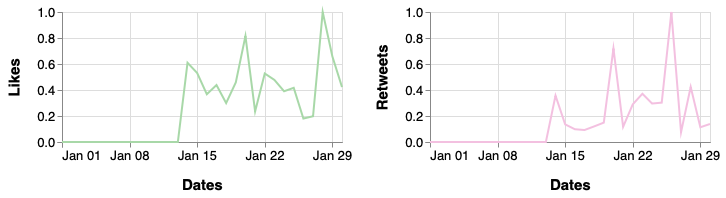

## February 2020

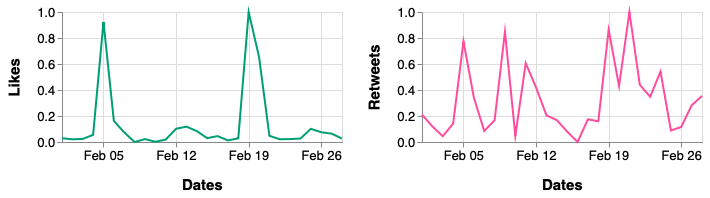

## March 2020

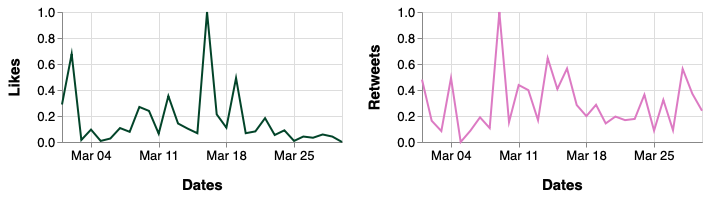

## April 2020

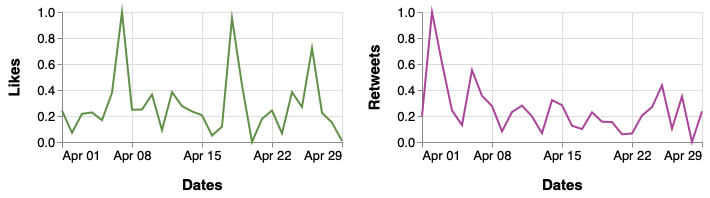

## May 2020

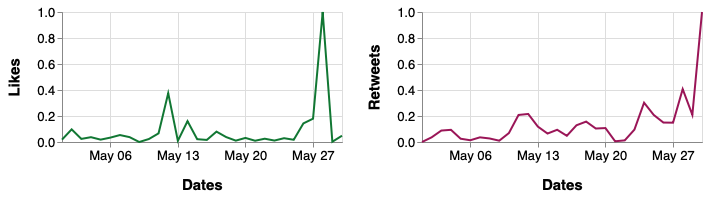

## June 2020

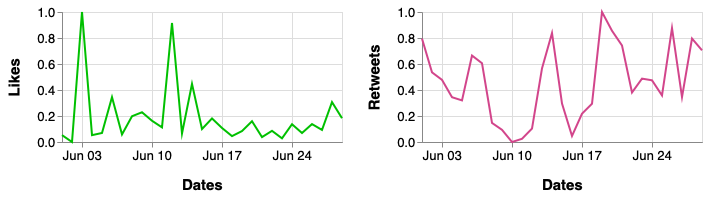

## July 2020

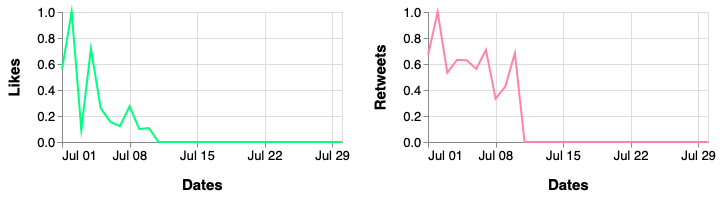